In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dwt-dataset/DataSet/Responders/R_DWT_1473.png
/kaggle/input/dwt-dataset/DataSet/Responders/R_DWT_1198.png
/kaggle/input/dwt-dataset/DataSet/Responders/R_DWT_447.png
/kaggle/input/dwt-dataset/DataSet/Responders/R_DWT_627.png
/kaggle/input/dwt-dataset/DataSet/Responders/R_DWT_383.png
/kaggle/input/dwt-dataset/DataSet/Responders/R_DWT_1481.png
/kaggle/input/dwt-dataset/DataSet/Responders/R_DWT_1461.png
/kaggle/input/dwt-dataset/DataSet/Responders/R_DWT_1889.png
/kaggle/input/dwt-dataset/DataSet/Responders/R_DWT_1673.png
/kaggle/input/dwt-dataset/DataSet/Responders/R_DWT_1849.png
/kaggle/input/dwt-dataset/DataSet/Responders/R_DWT_580.png
/kaggle/input/dwt-dataset/DataSet/Responders/R_DWT_972.png
/kaggle/input/dwt-dataset/DataSet/Responders/R_DWT_56.png
/kaggle/input/dwt-dataset/DataSet/Responders/R_DWT_411.png
/kaggle/input/dwt-dataset/DataSet/Responders/R_DWT_1548.png
/kaggle/input/dwt-dataset/DataSet/Responders/R_DWT_901.png
/kaggle/input/dwt-dataset/DataSet/Responders/R_DW

### No. of Responder Images

In [2]:
# Specify the path
path = "/kaggle/input/dwt-dataset/DataSet/Responders"

# Get the list of files in the directory
file_list = os.listdir(path)

# Print the list of files
# print("List of files:")
# for file_name in file_list:
#     print(file_name)

# Print the total number of files
total_files = len(file_list)
print("\nTotal number of files:", total_files)



Total number of files: 1995


### No. of non-responder Images

In [3]:
# Specify the path
path = "/kaggle/input/dwt-dataset/DataSet/Non_Responders"

# Get the list of files in the directory
file_list = os.listdir(path)

# Print the list of files
# print("List of files:")
# for file_name in file_list:
#     print(file_name)

# Print the total number of files
total_files = len(file_list)
print("\nTotal number of files:", total_files)



Total number of files: 3059


### Total Number of Images

In [4]:
folder_path = "/kaggle/input/dwt-dataset/DataSet/Responders"
image_extensions = [".jpg", ".jpeg", ".png", ".gif", ".bmp", ".tiff"]  # Add more extensions if needed

# Get the list of all files in the folder
all_files = os.listdir(folder_path)

# Filter out only the image files
image_files = [file for file in all_files if any(file.lower().endswith(ext) for ext in image_extensions)]

# Count the number of images
num_images = len(image_files)

print(f"Number of images in {folder_path}: {num_images}")

Number of images in /kaggle/input/dwt-dataset/DataSet/Responders: 1995


In [5]:
folder_path = "/kaggle/input/dwt-dataset/DataSet/Non_Responders"
image_extensions = [".jpg", ".jpeg", ".png", ".gif", ".bmp", ".tiff"]  # Add more extensions if needed

# Get the list of all files in the folder
all_files = os.listdir(folder_path)

# Filter out only the image files
image_files = [file for file in all_files if any(file.lower().endswith(ext) for ext in image_extensions)]

# Count the number of images
num_images = len(image_files)

print(f"Number of images in {folder_path}: {num_images}")

Number of images in /kaggle/input/dwt-dataset/DataSet/Non_Responders: 3059


In [6]:
Responders = 2166
Non_Responders = 3249

Total_Dataset_images  = Responders+Non_Responders
print("Total Number of images",Total_Dataset_images)

Total Number of images 5415


In [7]:
import os
import pandas as pd

# Define the base path
base_path = "/kaggle/input/dwt-dataset/DataSet"

# Initialize lists to store paths and labels
paths = []
labels = []

# Traverse through the folders and collect paths and labels
for folder in ["Responders", "Non_Responders"]:
    folder_path = os.path.join(base_path, folder)
    
    # Iterate through files in the folder
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        
        # Append path and label to the lists
        paths.append(file_path)
        labels.append(folder)

# Create a DataFrame
df = pd.DataFrame({"path": paths, "label": labels})

# Display the DataFrame
df


path           label
0     /kaggle/input/dwt-dataset/DataSet/Responders/R...      Responders
1     /kaggle/input/dwt-dataset/DataSet/Responders/R...      Responders
2     /kaggle/input/dwt-dataset/DataSet/Responders/R...      Responders
3     /kaggle/input/dwt-dataset/DataSet/Responders/R...      Responders
4     /kaggle/input/dwt-dataset/DataSet/Responders/R...      Responders
...                                                 ...             ...
5049  /kaggle/input/dwt-dataset/DataSet/Non_Responde...  Non_Responders
5050  /kaggle/input/dwt-dataset/DataSet/Non_Responde...  Non_Responders
5051  /kaggle/input/dwt-dataset/DataSet/Non_Responde...  Non_Responders
5052  /kaggle/input/dwt-dataset/DataSet/Non_Responde...  Non_Responders
5053  /kaggle/input/dwt-dataset/DataSet/Non_Responde...  Non_Responders

[5054 rows x 2 columns]

In [8]:
df["label"].value_counts()

label
Non_Responders    3059
Responders        1995
Name: count, dtype: int64

In [9]:
df.to_csv("EEG_Scalagram_Dataset.csv", index=False)

In [10]:
df = pd.read_csv("EEG_Scalagram_Dataset.csv")
df.head()

path       label
0  /kaggle/input/dwt-dataset/DataSet/Responders/R...  Responders
1  /kaggle/input/dwt-dataset/DataSet/Responders/R...  Responders
2  /kaggle/input/dwt-dataset/DataSet/Responders/R...  Responders
3  /kaggle/input/dwt-dataset/DataSet/Responders/R...  Responders
4  /kaggle/input/dwt-dataset/DataSet/Responders/R...  Responders

In [11]:
df["label"].value_counts()

label
Non_Responders    3059
Responders        1995
Name: count, dtype: int64

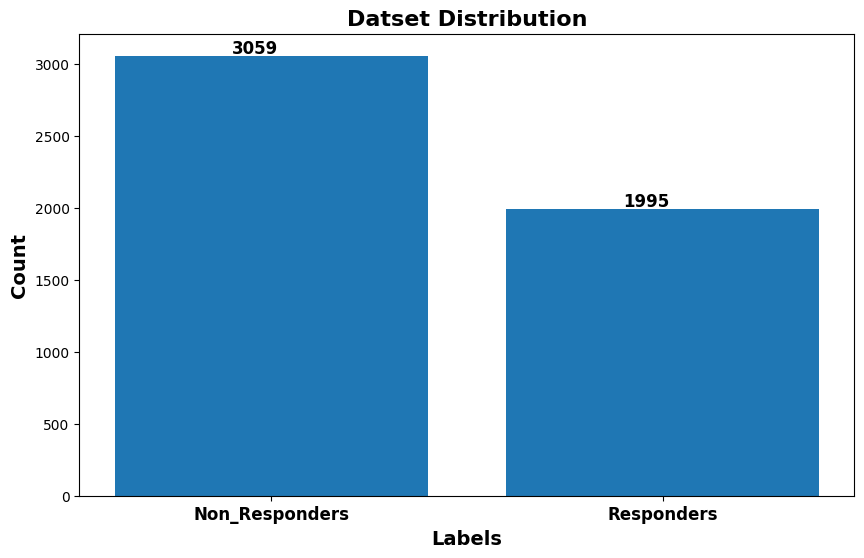

In [12]:
import matplotlib.pyplot as plt


label_counts = df["label"].value_counts()

# Plotting the bar plot with count representation
fig, ax = plt.subplots(figsize=(10, 6)) 
bars = plt.bar(label_counts.index, label_counts.values, linewidth=1.5)

# Customize x-label and y-label size
plt.xlabel('Labels', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

# Customize x-tick labels size and make them bold
plt.xticks(fontsize=12, fontweight='bold')

# Increase space between bars and count numbers
for bar, count in zip(bars, label_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 15, str(count), fontsize=12, fontweight='bold')

# Add a border to the bars
for bar in bars:
    bar.set_linewidth(1.5)

# Title of the plot
plt.title('Datset Distribution', fontsize=16, fontweight='bold')

# Show the plot
plt.show()


## Splitting  Training and Testing

stratify ensures that both the training and test sets maintain a similar class distribution as the original dataset.

In [13]:
from sklearn.model_selection import train_test_split

# Calculate the number of images for each class in the test set
test_size_percent = 0.1
num_responders_test = round(2166 * test_size_percent)  # Round to the nearest integer
num_non_responders_test = round(3249 * test_size_percent)  # Round to the nearest integer

# Split the dataset into train and test sets
train_df, test_df = train_test_split(df, test_size=test_size_percent, stratify=df['label'], random_state=42)

# Displaying the shapes of the resulting DataFrames
print("Train set shape:", train_df.shape)
print("Test set shape:", test_df.shape)

# Print the number of images in each class for the test set
print("Number of Responders in Test Set:", num_responders_test)
print("Number of Non_Responders in Test Set:", num_non_responders_test)


Train set shape: (4548, 2)
Test set shape: (506, 2)
Number of Responders in Test Set: 217
Number of Non_Responders in Test Set: 325


## Splitting Training and Validation

In [14]:
3898/32

121.8125

In [15]:
from sklearn.model_selection import StratifiedKFold

# Set up StratifiedKFold with 5 folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store training and validation sets
fold_train_dfs = []
fold_val_dfs = []

# Split the training set into 5 folds
for train_index, val_index in skf.split(train_df['path'], train_df['label']):
    train_fold = train_df.iloc[train_index]
    val_fold = train_df.iloc[val_index]
    
    # Append to the lists
    fold_train_dfs.append(train_fold)
    fold_val_dfs.append(val_fold)

# Print the number of images in each class for each fold
for fold, (train_fold, val_fold) in enumerate(zip(fold_train_dfs, fold_val_dfs), 1):
    print(f"Fold {fold} - Training Set Class Distribution:")
    print(train_fold['label'].value_counts())
    print(f"\nFold {fold} - Validation Set Class Distribution:")
    print(val_fold['label'].value_counts())
    print("\n" + "-"*40)


Fold 1 - Training Set Class Distribution:
label
Non_Responders    2202
Responders        1436
Name: count, dtype: int64

Fold 1 - Validation Set Class Distribution:
label
Non_Responders    551
Responders        359
Name: count, dtype: int64

----------------------------------------
Fold 2 - Training Set Class Distribution:
label
Non_Responders    2202
Responders        1436
Name: count, dtype: int64

Fold 2 - Validation Set Class Distribution:
label
Non_Responders    551
Responders        359
Name: count, dtype: int64

----------------------------------------
Fold 3 - Training Set Class Distribution:
label
Non_Responders    2202
Responders        1436
Name: count, dtype: int64

Fold 3 - Validation Set Class Distribution:
label
Non_Responders    551
Responders        359
Name: count, dtype: int64

----------------------------------------
Fold 4 - Training Set Class Distribution:
label
Non_Responders    2203
Responders        1436
Name: count, dtype: int64

Fold 4 - Validation Set Class 

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

val_datagen = ImageDataGenerator(rescale = 1./255)

2024-03-04 20:42:07.341109: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-04 20:42:07.341245: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-04 20:42:07.479135: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [17]:
from keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras import regularizers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

def cnn_model():
    model = Sequential()
    
    model.add(Conv2D(4, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(BatchNormalization())
    

    model.add(Conv2D(6, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    

    model.add(Conv2D(8, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    

    model.add(Conv2D(12, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    

    model.add(Flatten())
    
    model.add(Dropout(0.25))

    model.add(Dense(1, activation='sigmoid'))
   
    # Compile the model with the specified learning rate
    learning_rate = 0.0001
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    # Build the model
    model.build((None, 224, 224, 3))
    
    return model


In [18]:
# Create model
model = cnn_model()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 4)    │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 4)    │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 6)    │           222 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 220, 220, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 218, 218, 8)    │           440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 218, 218, 8)    │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 216, 216, 12)   │           876 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 216, 216, 12)   │            48 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 559872)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 559872)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │       559,873 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 561,643 (2.14 MB)

 Trainable params: 561,583 (2.14 MB)

 Non-trainable params: 60 (240.00 B)

In [20]:
# Initialize EarlyStopping 
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

Fold 1
Start Time: 2024-03-04 20:42:18
Found 3638 validated image filenames belonging to 2 classes.
train_generator classes {'Non_Responders': 0, 'Responders': 1}
Found 910 validated image filenames belonging to 2 classes.
val_generator classes {'Non_Responders': 0, 'Responders': 1}
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  2/114 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.4219 - loss: 1.7429  

I0000 00:00:1709584969.176227     112 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


114/114 ━━━━━━━━━━━━━━━━━━━━ 210s 2s/step - accuracy: 0.8219 - loss: 0.8580 - val_accuracy: 0.6055 - val_loss: 0.8606
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.9545 - loss: 0.1490 - val_accuracy: 0.6231 - val_loss: 1.0023
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.9831 - loss: 0.0413 - val_accuracy: 0.7264 - val_loss: 1.0993
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.9851 - loss: 0.0384 - val_accuracy: 0.9308 - val_loss: 0.3028
Epoch 5/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.9934 - loss: 0.0242 - val_accuracy: 0.9220 - val_loss: 0.3108
Epoch 6/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.9963 - loss: 0.0091 - val_accuracy: 0.9165 - val_loss: 0.3786
Epoch 7/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.9983 - loss: 0.0070 - val_accuracy: 0.9242 - val_loss: 0.3565
End Time: 2024-03-04 21:02:30
Elapsed Time for Fold 1: 1212.27 seconds

Training Loss: [0.6590688824653625, 

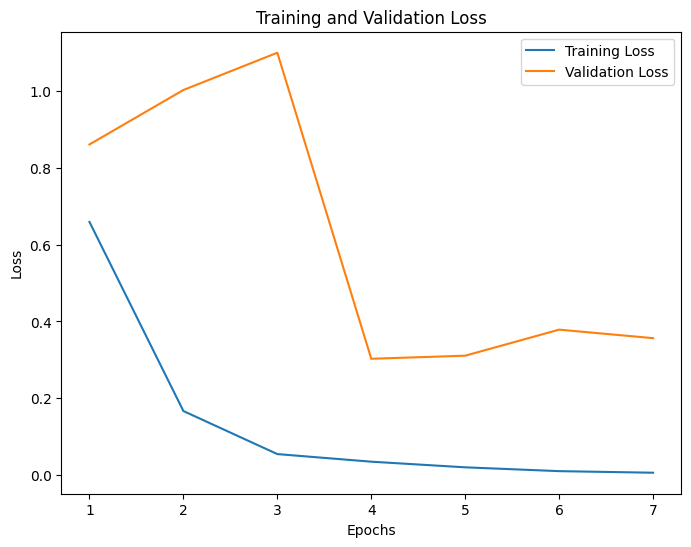

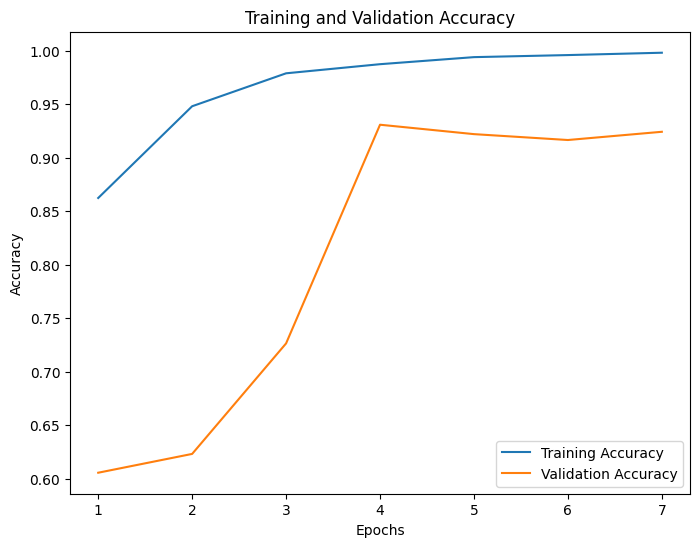

Fold 2
Start Time: 2024-03-04 21:02:31
Found 3638 validated image filenames belonging to 2 classes.
train_generator classes {'Non_Responders': 0, 'Responders': 1}
Found 910 validated image filenames belonging to 2 classes.
val_generator classes {'Non_Responders': 0, 'Responders': 1}
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


114/114 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.9636 - loss: 0.1643 - val_accuracy: 0.9352 - val_loss: 0.3509
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.9650 - loss: 0.1506 - val_accuracy: 0.9758 - val_loss: 0.0945
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.9907 - loss: 0.0316 - val_accuracy: 0.9418 - val_loss: 0.2698
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.9767 - loss: 0.0997 - val_accuracy: 0.9527 - val_loss: 0.2839
Epoch 5/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.9968 - loss: 0.0131 - val_accuracy: 0.9692 - val_loss: 0.1180
End Time: 2024-03-04 21:16:21
Elapsed Time for Fold 2: 829.76 seconds

Training Loss: [0.3631327450275421, 0.12490368634462357, 0.02836848795413971, 0.051773350685834885, 0.01398792676627636]
Validation Loss: [0.3508564531803131, 0.09448044002056122, 0.2698182761669159, 0.283907949924469, 0.11795763671398163]
Training Accuracy: [0.9406267404556274, 0.9694887399673

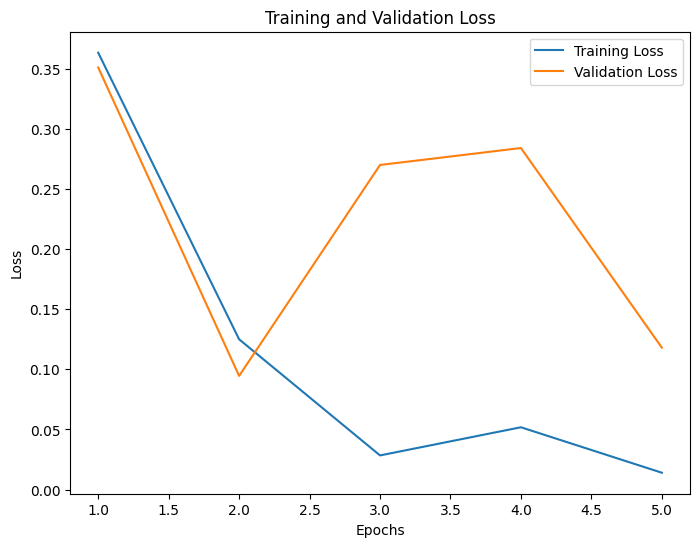

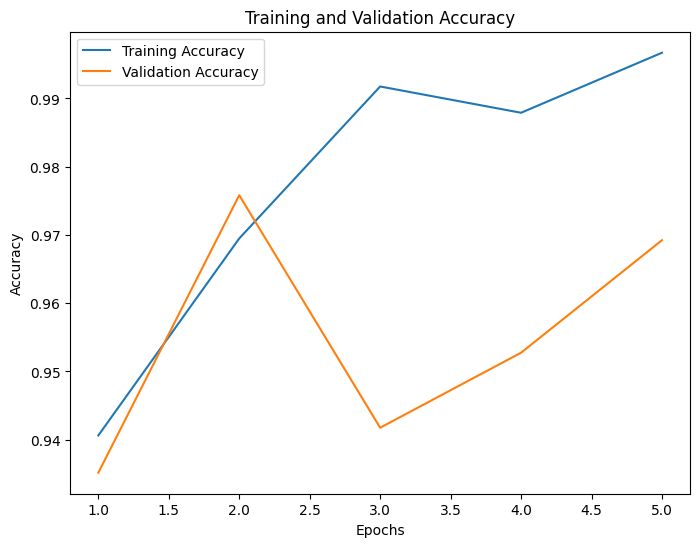

Fold 3
Start Time: 2024-03-04 21:16:21
Found 3638 validated image filenames belonging to 2 classes.
train_generator classes {'Non_Responders': 0, 'Responders': 1}
Found 910 validated image filenames belonging to 2 classes.
val_generator classes {'Non_Responders': 0, 'Responders': 1}
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


114/114 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.9815 - loss: 0.0791 - val_accuracy: 0.9813 - val_loss: 0.0901
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.9878 - loss: 0.0438 - val_accuracy: 0.9846 - val_loss: 0.0720
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.9917 - loss: 0.0310 - val_accuracy: 0.9835 - val_loss: 0.0624
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.9982 - loss: 0.0045 - val_accuracy: 0.9703 - val_loss: 0.1615
Epoch 5/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.9987 - loss: 0.0034 - val_accuracy: 0.9890 - val_loss: 0.0370
Epoch 6/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.9996 - loss: 0.0023 - val_accuracy: 0.9868 - val_loss: 0.0500
Epoch 7/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 1.0000 - loss: 7.3836e-04 - val_accuracy: 0.9857 - val_loss: 0.0474
Epoch 8/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 1.0000 - loss: 7.8072e-05 - val_accurac

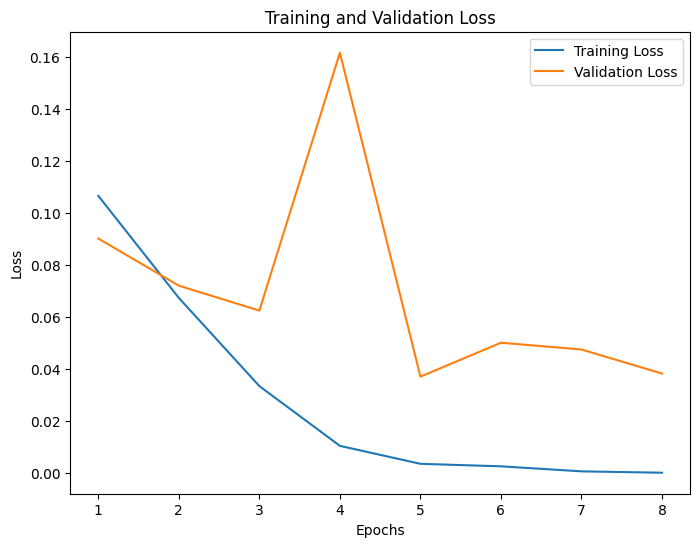

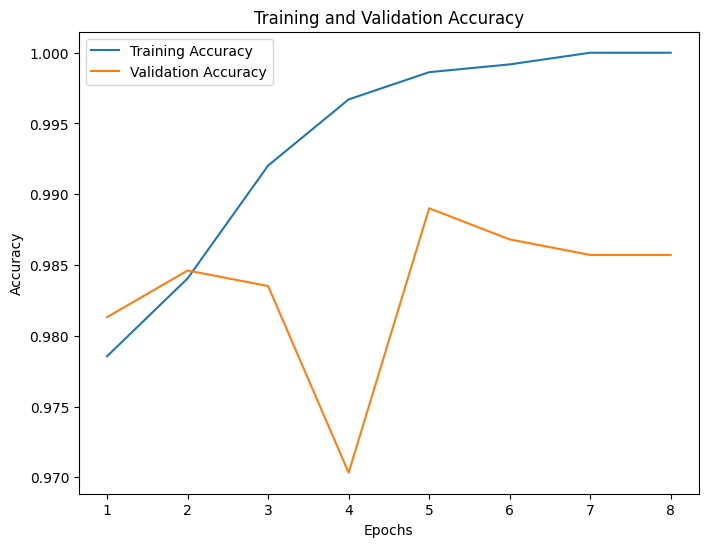

Fold 4
Start Time: 2024-03-04 21:38:28
Found 3639 validated image filenames belonging to 2 classes.
train_generator classes {'Non_Responders': 0, 'Responders': 1}
Found 909 validated image filenames belonging to 2 classes.
val_generator classes {'Non_Responders': 0, 'Responders': 1}
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


114/114 ━━━━━━━━━━━━━━━━━━━━ 183s 2s/step - accuracy: 0.9949 - loss: 0.0174 - val_accuracy: 0.9978 - val_loss: 0.0074
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.9952 - loss: 0.0192 - val_accuracy: 0.9967 - val_loss: 0.0097
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.9959 - loss: 0.0196 - val_accuracy: 0.9879 - val_loss: 0.0563
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.9889 - loss: 0.0521 - val_accuracy: 0.9824 - val_loss: 0.0698
End Time: 2024-03-04 21:49:50
Elapsed Time for Fold 4: 682.31 seconds

Training Loss: [0.03206843510270119, 0.012806413695216179, 0.051709212362766266, 0.0420810841023922]
Validation Loss: [0.007430132478475571, 0.009693879634141922, 0.05631747469305992, 0.0698312446475029]
Training Accuracy: [0.9903819561004639, 0.9961528182029724, 0.9890079498291016, 0.9901071786880493]
Validation Accuracy: [0.9977997541427612, 0.9966996908187866, 0.9878987669944763, 0.9823982119560242]


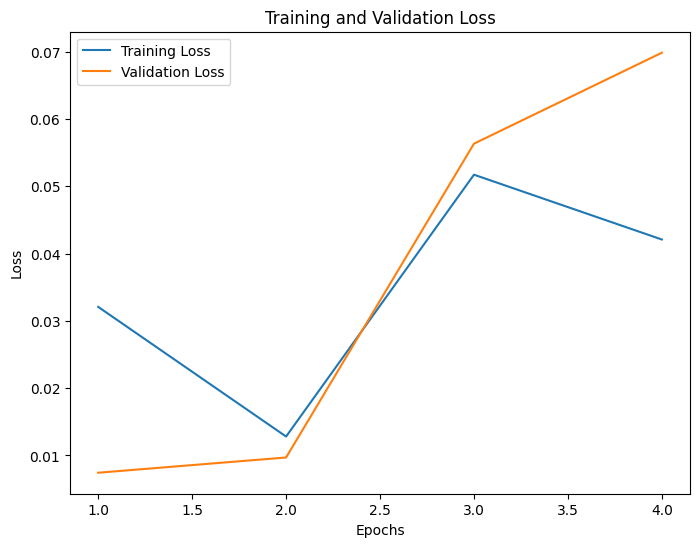

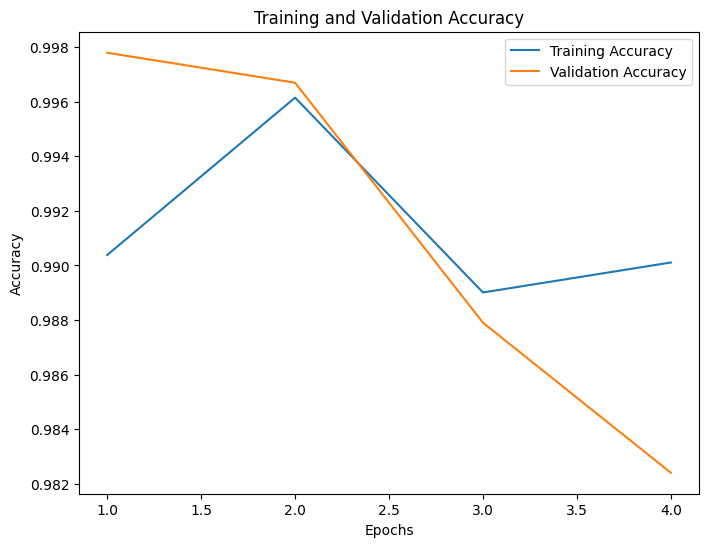

Fold 5
Start Time: 2024-03-04 21:49:51
Found 3639 validated image filenames belonging to 2 classes.
train_generator classes {'Non_Responders': 0, 'Responders': 1}
Found 909 validated image filenames belonging to 2 classes.
val_generator classes {'Non_Responders': 0, 'Responders': 1}
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


114/114 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.9853 - loss: 0.0601 - val_accuracy: 0.9934 - val_loss: 0.0364
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.9886 - loss: 0.0455 - val_accuracy: 0.9989 - val_loss: 0.0052
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.9935 - loss: 0.0239 - val_accuracy: 0.9813 - val_loss: 0.0958
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.9904 - loss: 0.0305 - val_accuracy: 0.9780 - val_loss: 0.0994
Epoch 5/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.9900 - loss: 0.0442 - val_accuracy: 0.9868 - val_loss: 0.0916
End Time: 2024-03-04 22:03:45
Elapsed Time for Fold 5: 834.25 seconds

Training Loss: [0.048245418816804886, 0.04033453390002251, 0.0481293760240078, 0.04997484013438225, 0.04518992081284523]
Validation Loss: [0.03639984875917435, 0.005158151499927044, 0.09582815319299698, 0.09940026700496674, 0.09158142656087875]
Training Accuracy: [0.9879087805747986, 0.99120634

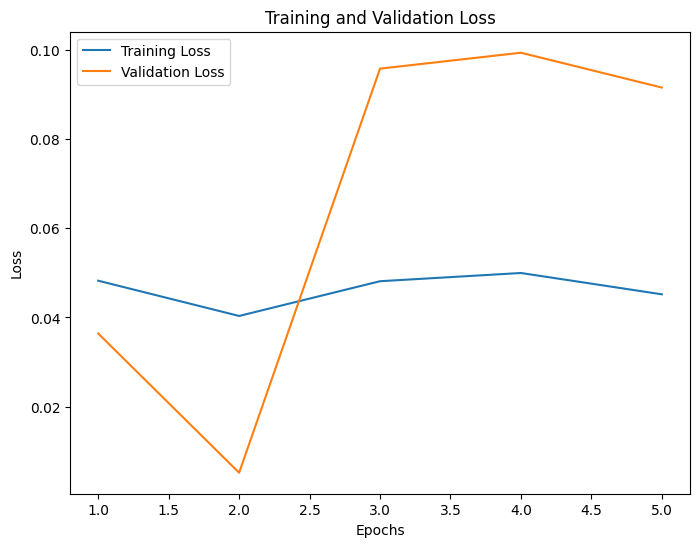

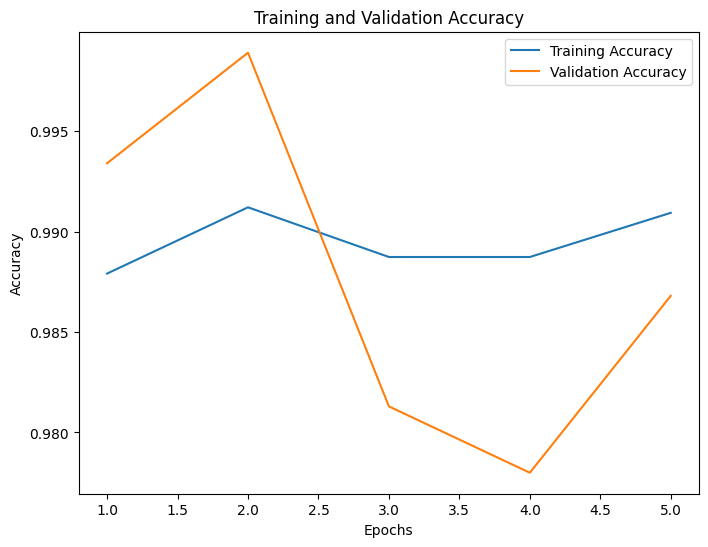

Total Training Time: 4884.40 seconds


In [21]:
import time
import matplotlib.pyplot as plt

# Number of epochs and batch size
epochs = 10
batch_size = 32

# Initialize lists to store loss and accuracy values
all_train_loss = []
all_val_loss = []
all_train_acc = []
all_val_acc = []

# Initialize lists to store start and end times
all_start_times = []
all_end_times = []

# Loop through the folds and fit the model
for i in range(5):
    print("Fold", i + 1)

    # Record the start time for the current fold
    start_time = time.time()
    all_start_times.append(start_time)
    print("Start Time:", time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(start_time)))

    # Get the current fold's training and validation sets
    fold_train = fold_train_dfs[i]
    fold_val = fold_val_dfs[i]

    # Training generator
    train_generator = train_datagen.flow_from_dataframe(
        dataframe=fold_train,
        x_col='path',
        y_col='label',
        target_size=(224, 224),
        batch_size=batch_size,
        seed=42,
        shuffle=True,
        class_mode='binary'
    )
    print("train_generator classes", train_generator.class_indices)

    # Validation generator
    val_generator = val_datagen.flow_from_dataframe(
        dataframe=fold_val,
        x_col='path',
        y_col='label',
        target_size=(224, 224),
        batch_size=batch_size,
        seed=42,
        shuffle=True,
        class_mode='binary'
    )
    print("val_generator classes", val_generator.class_indices)

    # Fit the model on the current fold's training and validation data
    history = model.fit(
        train_generator,
        epochs=epochs,
        verbose=1,
        validation_data=val_generator,
        callbacks=[early_stop]
    )

    # Record the end time for the current fold
    end_time = time.time()
    all_end_times.append(end_time)
    print("End Time:", time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(end_time)))

    # Calculate and print the elapsed time for the current fold
    elapsed_time = end_time - start_time
    print("Elapsed Time for Fold {}: {:.2f} seconds\n".format(i + 1, elapsed_time))

    # Print the training and validation loss and accuracy
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    print("Training Loss:", train_loss)
    print("Validation Loss:", val_loss)
    print("Training Accuracy:", train_acc)
    print("Validation Accuracy:", val_acc)

    # Append the loss and accuracy values to the lists
    all_train_loss.append(train_loss)
    all_val_loss.append(val_loss)
    all_train_acc.append(train_acc)
    all_val_acc.append(val_acc)

    # Plot the training and validation loss
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(history.epoch) + 1), train_loss, label='Training Loss')
    plt.plot(range(1, len(history.epoch) + 1), val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

    # Plot the training and validation accuracy
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(history.epoch) + 1), train_acc, label='Training Accuracy')
    plt.plot(range(1, len(history.epoch) + 1), val_acc, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

# Calculate and print the total training time
total_training_time = sum(all_end_times) - sum(all_start_times)
print("Total Training Time: {:.2f} seconds".format(total_training_time))


In [55]:
# Calculate and print the average loss and accuracy
avg_train_loss = [sum(epoch_loss) / len(epoch_loss) for epoch_loss in all_train_loss]
avg_val_loss = [sum(epoch_loss) / len(epoch_loss) for epoch_loss in all_val_loss]
avg_train_acc = [sum(epoch_acc) / len(epoch_acc) for epoch_acc in all_train_acc]
avg_val_acc = [sum(epoch_acc) / len(epoch_acc) for epoch_acc in all_val_acc]

print("Average Training Loss:", avg_train_loss)
print("Average Validation Loss:", avg_val_loss)
print("Average Training Accuracy:", avg_train_acc)
print("Average Validation Accuracy:", avg_val_acc)

Average Training Loss: [0.13606672248403942, 0.11643323935568332, 0.02802766531749512, 0.03466628631576896, 0.046374817937612535]
Average Validation Loss: [0.6158545315265656, 0.22340415120124818, 0.06983742490410805, 0.03581818286329508, 0.06567356940358877]
Average Training Accuracy: [0.9663472771644592, 0.9772952198982239, 0.9936434924602509, 0.9914124757051468, 0.9895026087760925]
Average Validation Accuracy: [0.8069073643003192, 0.9549450397491455, 0.983379103243351, 0.9911991059780121, 0.9876787662506104]


In [56]:
# Calculate and print the average loss and accuracy
mean_train_loss = sum(avg_train_loss) / len(avg_train_loss)
mean_val_loss = sum(avg_val_loss) / len(avg_val_loss)
mean_train_acc = sum(avg_train_acc) / len(avg_train_acc)
mean_val_acc = sum(avg_val_acc) / len(avg_val_acc)

print("Mean Training Loss:", mean_train_loss)
print("Mean Validation Loss:", mean_val_loss)
print("Mean Training Accuracy:", mean_train_acc)
print("Mean Validation Accuracy:", mean_val_acc)


Mean Training Loss: 0.07231374628211987
Mean Validation Loss: 0.20211757197976113
Mean Training Accuracy: 0.9836402148008346
Mean Validation Accuracy: 0.9448218759042877


In [57]:
import time

# Record start time
start_time = time.time()

# Setting the test set as the final evaluation set
evaluation_set = test_df

# Print the length of the evaluation set
print("Evaluation set length:", len(evaluation_set))

# Evaluate the model on the evaluation set
evaluation_generator = test_datagen.flow_from_dataframe(
    dataframe=evaluation_set,
    x_col='path',
    y_col='label',
    target_size=(224, 224),
    batch_size=batch_size,
    seed=1234,
    shuffle=False,
    class_mode='binary'
)
print("evaluation_generator classes", evaluation_generator.class_indices)

evaluation_loss, evaluation_accuracy = model.evaluate(evaluation_generator)

# Record end time
end_time = time.time()

# Calculate and print the time taken for evaluation
elapsed_time = end_time - start_time
print("Time taken for evaluation:", elapsed_time, "seconds")

print("Evaluation Loss:", evaluation_loss)
print("Evaluation Accuracy:", evaluation_accuracy)

Evaluation set length: 506
Found 506 validated image filenames belonging to 2 classes.
evaluation_generator classes {'Non_Responders': 0, 'Responders': 1}


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9335 - loss: 0.5600
Time taken for evaluation: 20.125020027160645 seconds
Evaluation Loss: 0.6434414982795715
Evaluation Accuracy: 0.9288537502288818


In [39]:
# # After training, save the model
model.save('DWT_ES_92_88.h5')
print("Model saved successfully")

Model saved successfully


In [40]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict on the evaluation set
evaluation_predictions = model.predict(evaluation_generator)
evaluation_pred_classes = (evaluation_predictions > 0.5).astype(int)

# Get true labels
true_labels = evaluation_generator.classes

# Class names
class_names = ['Non_Responders', 'Responders']

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, evaluation_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate classification report
class_report = classification_report(true_labels, evaluation_pred_classes, target_names=class_names)
print("Classification Report:")
print(class_report)


16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step
Confusion Matrix:
[[289  17]
 [ 19 181]]
Classification Report:
                precision    recall  f1-score   support

Non_Responders       0.94      0.94      0.94       306
    Responders       0.91      0.91      0.91       200

      accuracy                           0.93       506
     macro avg       0.93      0.92      0.93       506
  weighted avg       0.93      0.93      0.93       506



In [41]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict on the evaluation set
evaluation_predictions = model.predict(evaluation_generator)
evaluation_pred_classes = (evaluation_predictions > 0.5).astype(int)  

# Get true labels
true_labels = evaluation_generator.classes

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, evaluation_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)



# Calculate classification report
class_report = classification_report(true_labels, evaluation_pred_classes)
print("Classification Report:")
print(class_report)


16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step
Confusion Matrix:
[[289  17]
 [ 19 181]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       306
           1       0.91      0.91      0.91       200

    accuracy                           0.93       506
   macro avg       0.93      0.92      0.93       506
weighted avg       0.93      0.93      0.93       506



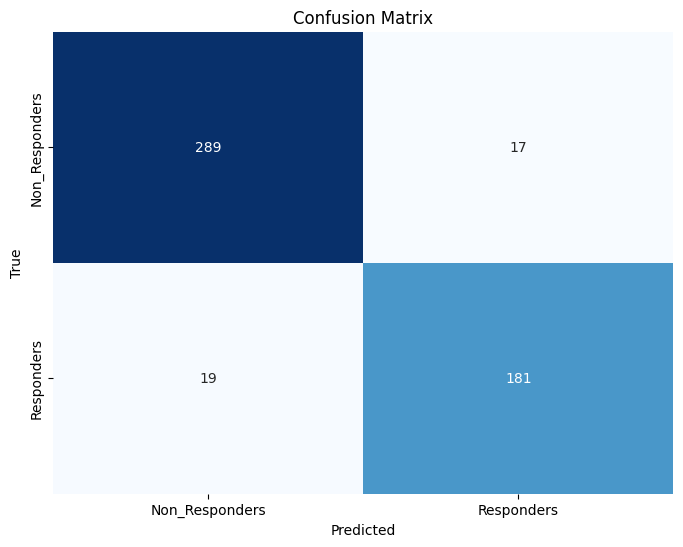

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       306
           1       0.91      0.91      0.91       200

    accuracy                           0.93       506
   macro avg       0.93      0.92      0.93       506
weighted avg       0.93      0.93      0.93       506



In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, class_names):
    fig, ax = plt.subplots(figsize=(8, 6))
    
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Assuming you already have the confusion matrix (conf_matrix) and class names
class_names = ['Non_Responders', 'Responders']
plot_confusion_matrix(conf_matrix, class_names)


# Calculate classification report
class_report = classification_report(true_labels, evaluation_pred_classes)
print("Classification Report:")
print(class_report)


In [43]:
print(evaluation_generator.classes)



[1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 

In [44]:
# Get true labels
true_labels = evaluation_generator.classes

# Predict on the evaluation set
evaluation_predictions = model.predict(evaluation_generator)
predicted_labels = (evaluation_predictions > 0.5).astype(int)

# Initialize counters for correct and incorrect predictions
correct_predictions = 0
incorrect_predictions = 0

# Iterate over all predictions
for i in range(len(true_labels)):
    if true_labels[i] == predicted_labels[i]:
        correct_predictions += 1
    else:
        incorrect_predictions += 1

# Calculate accuracy
accuracy = correct_predictions / (correct_predictions + incorrect_predictions)

# Print the results
print("Correct Predictions:", correct_predictions)
print("Incorrect Predictions:", incorrect_predictions)
print("Accuracy:", accuracy)

16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step
Correct Predictions: 470
Incorrect Predictions: 36
Accuracy: 0.9288537549407114


In [45]:
# confusion matrix (conf_matrix) and class names
class_names = ['Non_Responders', 'Responders']

# Print confusion matrix with counts
for i in range(len(class_names)):
    print(f"\nClass: {i} ({class_names[i]})")
    true_positives = conf_matrix[i, i]
    true_negatives = np.sum(np.delete(np.delete(conf_matrix, i, axis=0), i, axis=1))
    false_positives = np.sum(conf_matrix[:, i]) - true_positives
    false_negatives = np.sum(conf_matrix[i, :]) - true_positives

    print(f"True Positives (TP): {true_positives}")
    print(f"True Negatives (TN): {true_negatives}")
    print(f"False Positives (FP): {false_positives}")
    print(f"False Negatives (FN): {false_negatives}")
    print("====================")

# calculate and print overall metrics
overall_accuracy = np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix)
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)

print("\nOverall Metrics:")
print(f"Overall Accuracy: {overall_accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")



Class: 0 (Non_Responders)
True Positives (TP): 289
True Negatives (TN): 181
False Positives (FP): 19
False Negatives (FN): 17

Class: 1 (Responders)
True Positives (TP): 181
True Negatives (TN): 289
False Positives (FP): 17
False Negatives (FN): 19

Overall Metrics:
Overall Accuracy: 0.9288537549407114
Precision: [0.93831169 0.91414141]
Recall: [0.94444444 0.905     ]


In [46]:
# confusion matrix (conf_matrix) and class names
class_names = ['Non_Responders', 'Responders']

# Print class-specific metrics
for i in range(len(class_names)):
    precision = conf_matrix[i, i] / np.sum(conf_matrix[:, i]) if np.sum(conf_matrix[:, i]) != 0 else 0
    recall = conf_matrix[i, i] / np.sum(conf_matrix[i, :]) if np.sum(conf_matrix[i, :]) != 0 else 0
    specificity = np.sum(np.delete(np.delete(conf_matrix, i, axis=0), i, axis=1)) / (np.sum(conf_matrix) - np.sum(conf_matrix[:, i]) - np.sum(conf_matrix[i, :]) + conf_matrix[i, i])
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    print(f"\nClass: {class_names[i]}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"F1-score: {f1_score:.4f}")
    print("====================")



Class: Non_Responders
Precision: 0.9383
Recall: 0.9444
Specificity: 1.0000
F1-score: 0.9414

Class: Responders
Precision: 0.9141
Recall: 0.9050
Specificity: 1.0000
F1-score: 0.9095


In [47]:
# Calculate classification report
class_report = classification_report(true_labels, evaluation_pred_classes)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       306
           1       0.91      0.91      0.91       200

    accuracy                           0.93       506
   macro avg       0.93      0.92      0.93       506
weighted avg       0.93      0.93      0.93       506



16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step


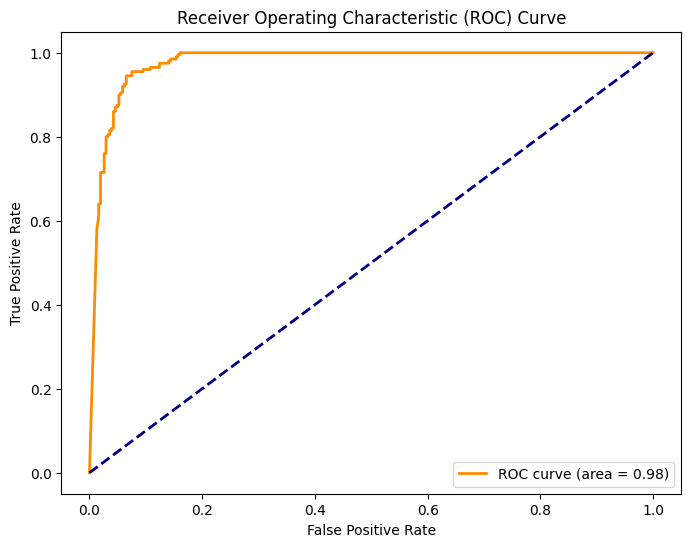

In [48]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# true labels and predicted probabilities
true_labels = evaluation_generator.classes
predicted_probabilities = model.predict(evaluation_generator)

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(true_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step


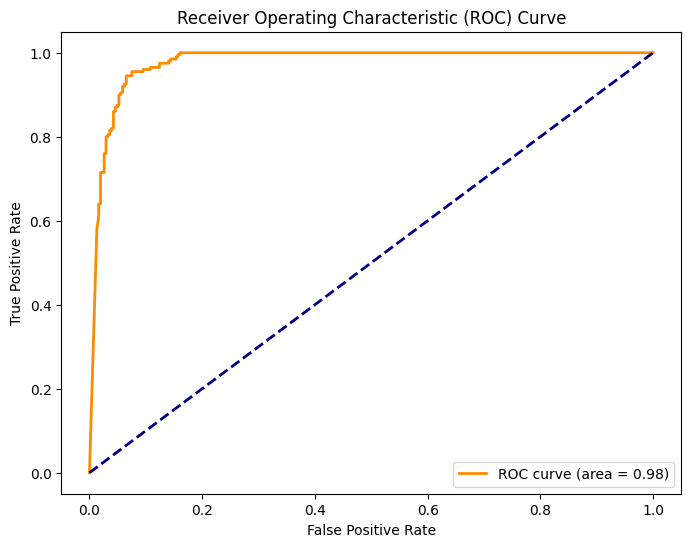

In [49]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# true labels and predicted probabilities
true_labels = evaluation_generator.classes
predicted_probabilities = model.predict(evaluation_generator)

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(true_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step


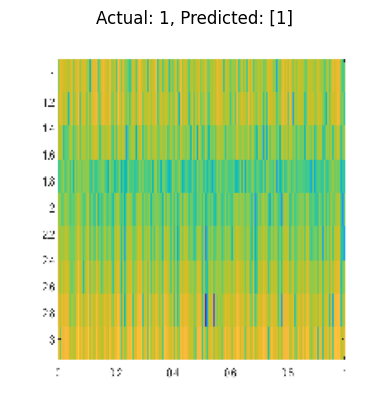

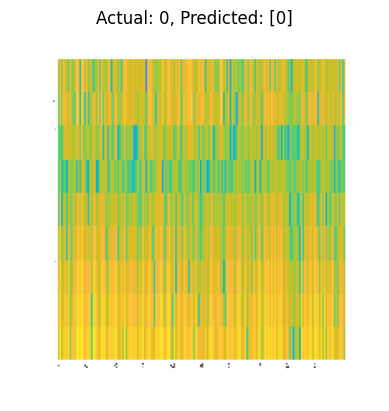

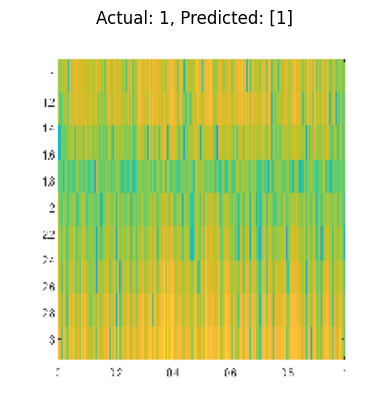

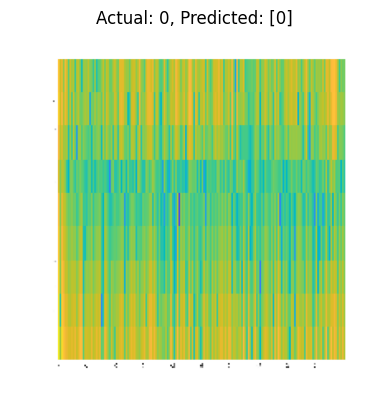

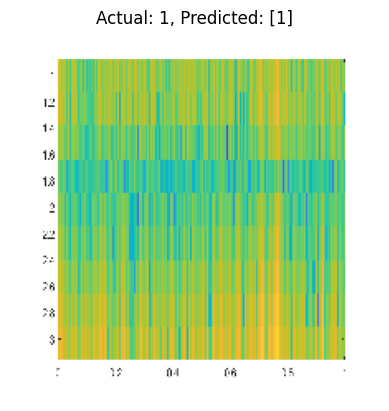

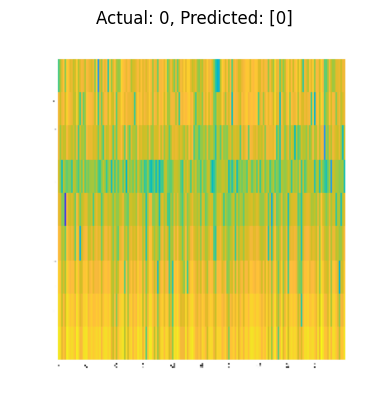

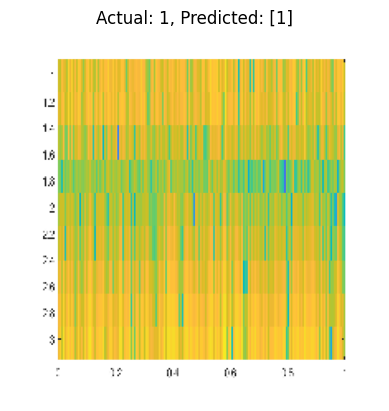

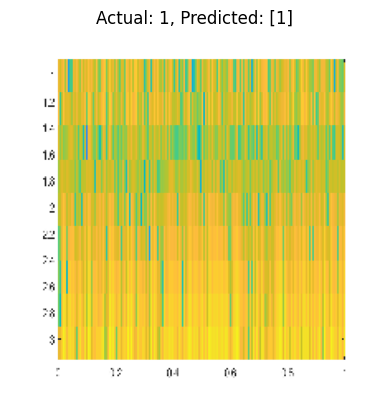

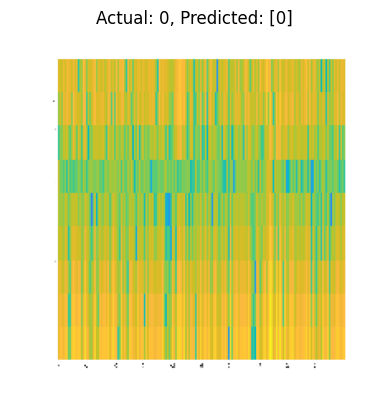

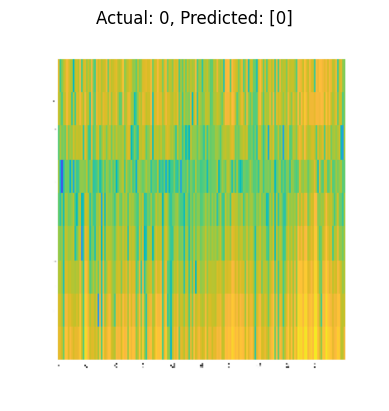

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image as keras_image

# Placeholder function for loading and preprocessing images
def load_and_preprocess_image(image_path):
    img = keras_image.load_img(image_path, target_size=(224, 224))
    img_array = keras_image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize pixel values to be between 0 and 1
    return img_array


# Get true labels
true_labels = evaluation_generator.classes

# Predict on the evaluation set
evaluation_predictions = model.predict(evaluation_generator)
predicted_labels = (evaluation_predictions > 0.5).astype(int)

# Display images along with actual and predicted labels
for i in range(len(true_labels[:10])):
    image_path = evaluation_set['path'].iloc[i]
    actual_label = true_labels[i]
    predicted_label = predicted_labels[i]

    # Load and preprocess the image
    image = load_and_preprocess_image(image_path)

    # Display the image
    plt.imshow(image[0])  # Since image is a batch, select the first element
    plt.title(f"Actual: {actual_label}, Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()


In [54]:
from tensorflow.keras.models import load_model

# Load the saved CNN model
loaded_model = load_model('/kaggle/working/DWT_ES_92_88.h5')

# evaluation set
evaluation_set = test_df

# Evaluate the loaded model on the evaluation set
evaluation_generator = test_datagen.flow_from_dataframe(
    dataframe=evaluation_set,
    x_col='path',
    y_col='label',
    target_size=(224, 224),
    batch_size=batch_size,
    seed=1234,
    shuffle=False,
    class_mode='binary'
)

# Evaluate the model
evaluation_loss, evaluation_accuracy = loaded_model.evaluate(evaluation_generator)

print("Evaluation Loss:", evaluation_loss)
print("Evaluation Accuracy:", evaluation_accuracy)

Found 506 validated image filenames belonging to 2 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9335 - loss: 0.5600
Evaluation Loss: 0.6434414982795715
Evaluation Accuracy: 0.9288537502288818
